<a href="https://colab.research.google.com/github/gsfreitas/engenharia-medica/blob/main/atividade_pratica_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e funções

In [2]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
import scipy.io
import scipy.fft as fft
from scipy.signal import welch
from sklearn import svm
from scipy.stats import shapiro
import seaborn as sns
import operator

In [3]:
def t8_SVM(X,classesX,C=0.1,kernel='linear',tol=0.001,gamma='scale'):
    #Treina uma SVM em um conjunto de dados X
    # INTPUS:
    # - X = matriz padrões x características
    # - classesX = vetor com as classes dos padrões (0 ou 1)
    # - C, kernel e tol são os parâmetros da SVM
    # OUTPUTS:
    # - clf = objeto da SVM
    # - txerro = erro de treinamento

    # Cria um objeto SVM com os parâmetros especificados
    clf=svm.SVC(C=C,kernel=kernel,tol=tol,gamma=gamma)

    # Treina a SVM com os dados de entrada (X) e suas respectivas classes (classesX)
    clf.fit(X,classesX)

    # Imprime o número de vetores de suporte para cada classe
    for i in range(len(clf.n_support_)):
        print('Numero de vetores de suporte classe '+str(i)+': '+str(clf.n_support_[i]))

    # Faz previsões no conjunto de treinamento
    y=clf.predict(X)

    # Calcula a taxa de erro de treinamento
    txerro=sum(y!= classesX)/classesX.size

    # Imprime a taxa de erro de treinamento
    print('Taxa de erro treinamento: '+str(100*txerro)+'%')

    # Retorna o objeto SVM treinado (clf) e a taxa de erro de treinamento
    return clf, txerro

In [26]:
def t6_plotaperceptron(classe1,classe2,w,titulo,angulo=(-140,40)):
    #Faz o gráfico do Perceptron (para 2 ou 3 características)
    # Inputs:
    # - classe 1: L x N1 da primeira classe (características x padrões)
    # - classe 2: L x N2 da segunda classe (características x padrões)
    # - w = vetor de pesos do perceptron
    # - titulo = string com o titulo do grafico
    # - angulo = angulo de visualização (para o caso de 3 características)
    L=np.size(w) #dimensão do Perceptron (estendida, ou seja = número de características + 1)
    if L==3:
        plt.figure()
        plt.plot(classe1[0,:],classe1[1,:],'bo',fillstyle='none')
        plt.plot(classe2[0,:],classe2[1,:],'ro',fillstyle='none')
        x1=plt.xlim()[0]
        x2=plt.xlim()[1]
        x=np.linspace(x1,x2,1000)
        y=-(w[0]*x+w[2])/w[1]
        plt.plot(x,y,'--')
        plt.title(titulo)
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.show()
    elif L==4:
        plt.figure()
        ax=plt.axes(projection='3d')
        ax.plot(classe1[0,:],classe1[1,:],classe1[2,:],'bo',fillstyle='none')
        ax.plot(classe2[0,:],classe2[1,:],classe2[2,:],'ro',fillstyle='none')
        x=ax.get_xlim()
        y=ax.get_ylim()
        (xx,yy)=t8_makemeshgrid(np.asarray(x), np.asarray(y),0.01)
        z = (-w[0]*xx -w[1]*yy -w[3])/w[2];
        ax.plot_surface(xx,yy,z,edgecolor='none')
        ax.view_init(angulo[0],angulo[1])
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.set_zlabel('Dim 3')
        plt.show()
    else:
        print('ERRO: apenas para 2 ou 3 dimensões')

# SVM Linear

**1) [SVM linear]:** Vamos começar esta atividade com dois exercícios para testarmos o algoritmo da SVM. Neste primeiro exercício, vamos empregar a SVM na discriminação de 500 padrões, divididos em duas classes normalmente distribuídas, em um espaço de duas características e que estão salvos no arquivo “Dados_exercício1.mat” *(ver figura 1)*.

In [4]:
# lendo os dados
dados_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['X']
classes_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['classesX']

In [5]:
# alterando os dados das classes para tipo binario
classes_1 = np.where(classes_1==1, 0, classes_1)
classes_1 = np.where(classes_1==2, 1,  classes_1)

In [6]:
# criando um vetor referência unidimensional
mask = classes_1.ravel()

# separando as classes
e1_class_1 = dados_1[:, mask==0]
e1_class_2 = dados_1[:, mask==1]

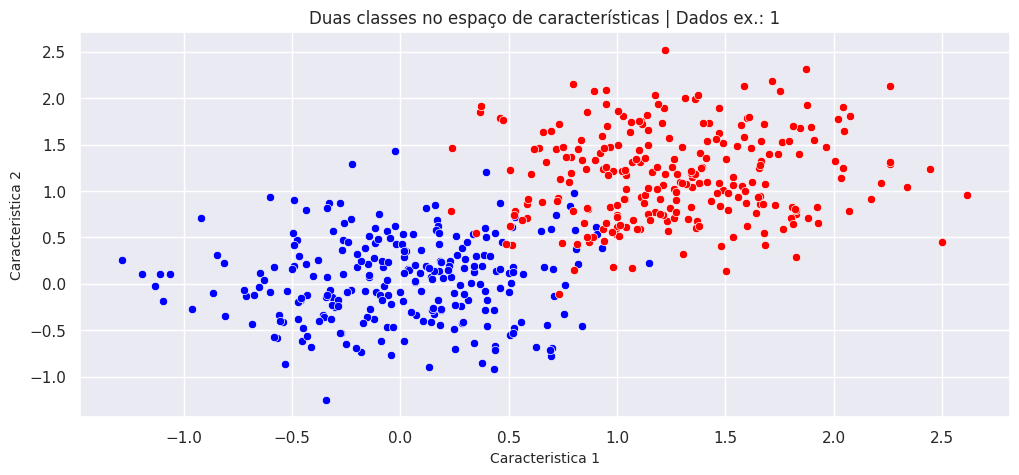

In [7]:
# plot do espaco de caracteristicas
plt.figure(figsize=(12,5))
sns.set_theme()

sns.scatterplot(x=e1_class_1[0], y=e1_class_1[1], color='blue', markers='O')
sns.scatterplot(x=e1_class_2[0], y=e1_class_2[1], color='red', markers='O')

plt.title('Duas classes no espaço de características | Dados ex.: 1', fontsize=12)
plt.xlabel('Caracteristica 1', fontsize=10)
plt.ylabel('Caracteristica 2', fontsize=10)

plt.show()

**a)** Inicie treinando um classificador com máquina de vetores de suporte nestes dados. Para isso, empregue a função “t8_SVM” disponível no github do curso e que se baseia no método SVC da biblioteca Scikit-learn (explore os parâmetros deste método para compreender sua utilização). Utilize os seguintes parâmetros da SVC neste exercício: C=0.1, kernel=*linear*, tol=0.001.

In [8]:
# treinando o classificador
# usamos classes_1[0] para selecionar apenas o array
clf, txerro = t8_SVM(dados_1.T, classes_1[0], C=0.1, kernel='linear', tol=0.001, gamma='scale')

Numero de vetores de suporte classe 0: 53
Numero de vetores de suporte classe 1: 53
Taxa de erro treinamento: 4.0%


**b)** Verifique o número de “support vectors” utilizados na classificação: observe no código que o número de vetores de suporte pode ser acessado diretamente através do atributo *n_support_* da SVC.

In [28]:
# verificando os numeros de svm por meio do atributo
clf.n_support_

array([53, 53], dtype=int32)

**c)** Verifique o número de pontos que foram erroneamente classificados neste treinamento: observe no código que isto pode ser realizado através do método “predict” da SVC.

Este método é chamado no objeto SVM treinado (SVC) e é usado para fazer previsões para o conjunto de dados X. O argumento X é um array-like ou matriz de forma (n_samples, n_features) que representa os dados para os quais você deseja fazer previsões.

In [20]:
# observando as previsões
predict = clf.predict(dados_1.T)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
# resultado atual
classes_1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [24]:
# calculo dos padroes classificados erroneamente
n_erros = txerro * predict.size
print(f'Número aproximado de padrões classificados erroneamente: {n_erros}')

Número aproximado de padrões classificados erroneamente: 20.0


**d)** Para visualizar o resultado, plote os dados simulados e as linhas do classificador. No caso da SVM linear, como neste exercício, você pode empregar a mesma função da aula 17 para plotar o classificador (“t6_plotaperceptron”). Observe que os pesos do classificador (“w”) podem ser obtidos a partir do objeto da SVM (variável “clf” no output de “t8_SVM”) com o seguinte comando:



```
# w = np.concatenate([clf.coef_[0], clf.intercept_])
```



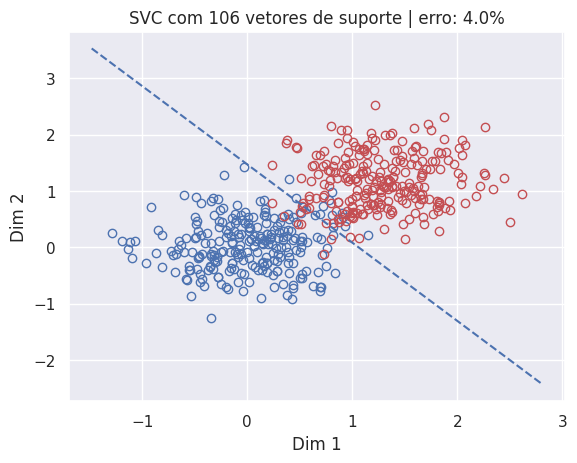

In [33]:
# definicao do peso do classificador
w = np.concatenate([clf.coef_[0], clf.intercept_])

# plot do resultado
t6_plotaperceptron(e1_class_1, e1_class_2, w,
                   f"SVC com {clf.n_support_[0] + clf.n_support_[1]} vetores de suporte | erro: {txerro*100}%",
                   angulo=(-140,40))